# Analysis of NPGPE-POIS

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

plt.close('all')

delta = 0.2

def read_data(path):
    df = pd.read_csv(path + 'progress.csv')
    iterations = len(df)
    batch_size = df['BatchSize']
    theta = []
    for i in range(8):
        theta.append([])
    for i in range(iterations):
        policy_params = np.load(path + 'weights_' + str(i) + '.npy')
        #iws = np.load(path + 'iws_' + str(i) + '.npy')
        for i in range(8):
            theta[i].append(policy_params[i])
    for i in range(8):
        df['theta%i' % (i+1)] = theta[i]
    df['CumAvgRew'] = np.cumsum(df['AvgRet'])/iterations
    return df

def plot_data(dfs, columns, bottom=-np.infty, top=np.infty, rng=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if type(dfs) is not list:
        dfs = [dfs]
    n_subplots = len(dfs)
    for i in range(n_subplots): 
        df = dfs[i]
        if rng is not None:
            df = df[rng]
        ax.set_xlabel('Iteration')
        x = range(len(df))
        for col in columns:
            y = np.clip(df[col], bottom, top)
            ax.plot(x, y, label=col)
        ax.legend()
    return fig

def plot_ci(mean, std, conf, n_runs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(mean.index, mean)
    interval = sts.t.interval(conf, n_runs-1,loc=mean,scale=std/np.sqrt(n_runs))
    ax.fill_between(mean.index, interval[0], interval[1], alpha=0.3)
    return fig

# Cartpole

## Setting:
* Policy: determinisitc linear w/o bias
* Available random seeds: 107, 583, 850, 730, 808
* Batch size: 100
* Task variant: gym
* Horizon: 200

### Performance (undiscounted) on 5 different random seeds

**Available data**

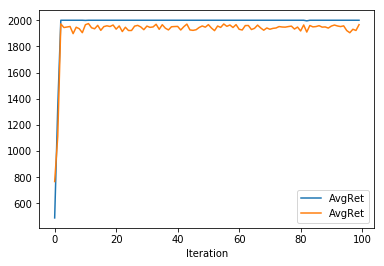

In [34]:
common_path = '../results/npgpepois/cartpole/seed_'
seeds = [850, 730]

dfs = []
for s in seeds:
    dfs.append(read_data(common_path + str(s) + '/'))
plot_data(dfs, ['AvgRet'])

In [35]:
n_iter = min(len(df) for df in dfs)
n_runs = len(dfs)
print('Number of runs:', n_runs)
print('Number of iterations per run:', n_iter)

Number of runs: 2
Number of iterations per run: 100


In [36]:
print('Columns:', list(dfs[0]))

Columns: ['AvgNormIw', 'eRenyi2', 'VarDiscRet', 'ESSClassic', 'J', 'MaxNormIw', 'AvgEpLen', 'AvgVanillaIw', 'VarVanillaIw', 'VarRet', 'VarNormIw', 'Bound', 'BatchSize', 'VarJ', 'AvgDiscRet', 'MinNormIw', 'ESSRenyi', 'MinVanillaIw', 'MaxVanillaIw', 'AvgRet', 'theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8', 'CumAvgRew']


In [37]:
concat_df = pd.concat(dfs, axis=1)
mean_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).mean()
std_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).std()

Average performance with 95% confidence intervals:


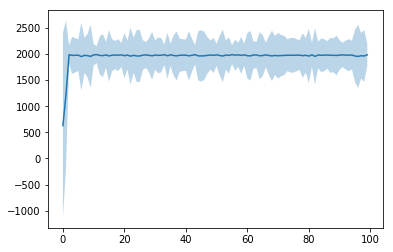

In [38]:
conf = 0.95
print('Average performance with %i%% confidence intervals:' % (conf*100))
mean = mean_df['AvgRet']
std = std_df['AvgRet']
plot_ci(mean, std, conf, n_runs)

In [39]:
cum_mean = mean_df['CumAvgRew'][len(mean_df)-1]
cum_std = std_df['CumAvgRew'][len(mean_df)-1]
interval = sts.t.interval(conf, n_runs-1,loc=cum_mean,scale=cum_std/np.sqrt(n_runs))
print('Average cumulative reward: %f, c.i. %s' % (cum_mean, interval))

Average cumulative reward: 1951.305131, c.i. (1610.8981405903946, 2291.712121891063)


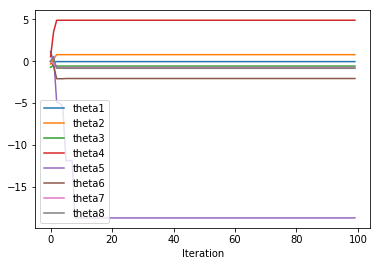

In [40]:
args = ['theta%i'%(i+1) for i in range(8)]
plot_data(dfs[0], args)

In [49]:
plot_data(dfs[1], ['eRenyi2'])
dfs[1]['Bound']
#dfs[1]['theta5']

0     295.82742
1     488.09015
2     844.29640
3     829.53570
4     823.45220
5     823.85260
6     802.01636
7     817.88340
8     813.77264
9     806.89810
10    844.81450
11    861.78217
12    854.41820
13    852.64160
14    859.07440
15    850.93740
16    856.80530
17    857.88420
18    857.08730
19    859.45860
20    852.35583
21    858.58040
22    848.90330
23    856.42596
24    850.95290
25    850.26410
26    858.30334
27    858.84350
28    855.78076
29    850.62164
        ...    
70    852.17316
71    853.50684
72    853.36285
73    855.43665
74    855.47614
75    856.97675
76    857.75620
77    857.91730
78    852.52905
79    855.79767
80    849.60910
81    860.02660
82    847.03625
83    858.57000
84    856.40250
85    856.41320
86    857.95360
87    855.59906
88    856.21910
89    854.52673
90    857.91656
91    859.26610
92    857.54694
93    857.13570
94    857.72240
95    851.57590
96    847.00990
97    853.19430
98    850.21924
99    859.94490
Name: Bound, Length: 100